In [10]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import konlpy
from konlpy.tag import Okt
from collections import Counter
import konlpy.tag
import pandas as pd

def get_news():
    client_id = "OKQPTGKiQf0V3yitzK6o"
    client_secret = "uIGSvzveCB"


    keyword = input('뉴스 검색어를 입력해주세요')

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/news?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                print(response_body.decode('utf-8'))
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)

                jdata['items']

                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)

    f = open('{0} - 네이버API 뉴스검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
            f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    return result

In [11]:
def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()

def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text


def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud( font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='Blues').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='Blues').generate(noun_text)
        
#     wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file('../data/크롤링/savename' + '.png')


In [12]:
bdata = get_news()
rtext = get_text(bdata)

뉴스 검색어를 입력해주세요어린이보호구역
{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:54 +0900",
"total": 104777,
"start": 1,
"display": 100,
"items": [
{
"title": "금호타이어, 전국 초등학생 대상 '<b>어린이</b> 교통안전교육' 실시",
"originallink": "https://www.news1.kr/articles/?4447829",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=103&oid=421&aid=0005629159",
"description": "금호타이어가 제작한 워크북에는 Δ안전한 보행법 Δ<b>어린이 보호구역</b>에서 지켜야 할 안전수칙 Δ교통안전 표지판 Δ바퀴 달린 놀이기구의 안전한 이용법 Δ도전! 안전 골든벨(퀴즈) Δ내가 만드는 안전한 학교 가는 길... ",
"pubDate": "Thu, 30 Sep 2021 08:52:00 +0900"

},
{
"title": "금호타이어, '<b>어린이</b> 교통안전교육' 진행",
"originallink": "http://autotimes.hankyung.com/apps/news.sub_view?popup=0&nid=03&c1=03&c2=03&c3=00&nkey=202109301046191",
"link": "http://autotimes.hankyung.com/apps/news.sub_view?popup=0&nid=03&c1=03&c2=03&c3=00&nkey=202109301046191",
"description": "금호타이어에서 제작한 워크북에는 안전한 보행법, <b>어린이 보호구역</b>에서 지켜야 할 안전수칙, 교통안전 표지판, 바퀴 달린 놀이기구의 안전한 이용법, 도전! 안전 골든벨(퀴즈), 내가 만드는 안전한 학교 가는 길... ",
"pubDate": "Thu, 30 Sep 2021 10:48:00

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:54 +0900",
"total": 104777,
"start": 101,
"display": 100,
"items": [
{
"title": "DB손해보험, <b>어린이</b> 교통안전 및 소외계층 지원을 위한 협약 체결",
"originallink": "http://www.datanews.co.kr/news/article.html?no=115502",
"link": "http://www.datanews.co.kr/news/article.html?no=115502",
"description": "DB손해보험(대표 김정남)은 초록우산<b>어린이</b>재단(회장 이제훈)과 <b>어린이보호구역</b> 교통안전을 위한 옐로카펫 설치 및 소외계층 지원을 위한 '사랑나눔봉사 협약'을 체결했다고 27일 밝혔다. <b>어린이</b> 교통사고 예방을 위해... ",
"pubDate": "Mon, 27 Sep 2021 10:04:00 +0900"

},
{
"title": "이소영 &quot;<b>어린이 보호구역</b> 지정에 미인가 대안학교 포함하는 길 열려&quot;",
"originallink": "http://www.iminju.net/news/articleView.html?idxno=75494",
"link": "http://www.iminju.net/news/articleView.html?idxno=75494",
"description": "ⓒ 뉴시스 <b>어린이 보호구역</b> 지정대상에 미인가 대안학교도 포함돼 <b>어린이</b> 안전을 더 두텁게 <b>보호</b>할 수 있게 됐다. 더불어민주당 이소영 의원이 발의한 '도로교통법 개정안'이 28일 국회 본회의를 통과하면서 <b>어린이</b>... ",
"pubDate": "Tue, 28 Sep 2021 18:07:00 +0900"

},
{
"title": "DB손해보험, <b>어린이</b> 교통안전 및 소외계층 지원 위해 팔 걷어",


{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:54 +0900",
"total": 104777,
"start": 201,
"display": 100,
"items": [
{
"title": "DB손보, 초록우산<b>어린이</b>재단과 옐로카펫·사랑나눔봉사 협약 체결",
"originallink": "https://www.asiatoday.co.kr/view.php?key=20210927010013059",
"link": "https://www.asiatoday.co.kr/view.php?key=20210927010013059",
"description": "DB손해보험은 초록우산<b>어린이</b>재단과 <b>어린이보호구역</b> 교통안전을 위한 ‘옐로카펫’ 설치 및 소외계층 지원을 위한 ‘사랑나눔봉사’ 협약을 체결했다고 27일 밝혔다. DB손해보험이 추진하고 있는 ‘옐로 카펫’ 설치... ",
"pubDate": "Mon, 27 Sep 2021 10:12:00 +0900"

},
{
"title": "인천시, <b>어린이보호구역</b> 교차로 노란신호등으로 전면 교체",
"originallink": "https://www.dnews.co.kr/uhtml/view.jsp?idxno=202109131040362170338",
"link": "https://www.dnews.co.kr/uhtml/view.jsp?idxno=202109131040362170338",
"description": "그동안 인천시는 「민식이법」 관련해 <b>어린이보호구역</b> 교통안전시설 확충을 위해 2020년 16억 원, 2021년 38억 원 등 국비를 지원 받았고, 작년에는 35억 원 교차로 73개소, 금년에는 총사업비 81억 중 55억 원을 집행해... ",
"pubDate": "Mon, 13 Sep 2021 13:50:00 +0900"

},
{
"title": "교통사고 잦은 <b>어린이보호구역</b> 36곳 합동 현장점검",
"originallin

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:55 +0900",
"total": 104777,
"start": 301,
"display": 100,
"items": [
{
"title": "김원기 경기도의원, ‘<b>어린이</b> 교통안전 릴레이 챌린지’ 참여",
"originallink": "https://www.seoul.co.kr/news/newsView.php?id=20210916500107&wlog_tag3=naver",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=004&oid=081&aid=0003216744",
"description": "경기도의회 안전행정위원회 김원기 의원(더불어민주당·의정부4)이 <b>어린이보호구역</b> 내 교통안전문화 정착과 사고예방을 위한 ‘<b>어린이</b> 교통안전 릴레이 챌린지’에 동참했다. 김원기 의원은 ‘1단 멈춤, 2쪽 저쪽, 3초... ",
"pubDate": "Thu, 16 Sep 2021 15:41:00 +0900"

},
{
"title": "<b>어린이 보호구역</b> 점검하는 최관호 서울경찰청장",
"originallink": "http://www.newsis.com/view/?id=NISI20210906_0017920030",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010703797",
"description": "최관호(왼쪽) 서울경찰청장이 6일 오전 서울 서대문구 연가초등학교에서 <b>어린이 보호구역</b> 등굣길을 점검하고 있다. (사진=서울경찰청 제공) 2021.09.06. photo@newsis.com *재판매 및 DB 금지 공감언론 뉴시스가 독자... ",
"pubDate": "Mon, 06 Sep 2021 11:27:00 +0900"

},
{
"title":

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:56 +0900",
"total": 104777,
"start": 401,
"display": 100,
"items": [
{
"title": "김만기 프리드라이프 대표, ‘<b>어린이</b> 교통안전 챌린지’ 동참",
"originallink": "https://daily.hankooki.com/lpage/industry/202109/dh20210903091419147950.htm?s_ref=nv",
"link": "https://daily.hankooki.com/lpage/industry/202109/dh20210903091419147950.htm?s_ref=nv",
"description": "김 대표는 중구 프리드라이프 본사에서 본 캠페인 슬로건인 ‘<b>어린이 보호구역</b> △1단 멈춤 △2쪽 저쪽 △3초 동안 △4고 예방’의 의미와 중요성을 임직원에 전하고 적극적인 동참을 강조하며 릴레이 캠페인을 실천했다.... ",
"pubDate": "Fri, 03 Sep 2021 09:16:00 +0900"

},
{
"title": "시흥시, <b>어린이보호구역</b> 내 옐로카펫 설치 43개소로 늘어",
"originallink": "http://www.paxetv.com/news/articleView.html?idxno=126558",
"link": "http://www.paxetv.com/news/articleView.html?idxno=126558",
"description": "시흥시청 전경 경기 시흥시는 <b>어린이</b> 교통안전사고 예방 및 지역 교통안전 개선을 위해 은행초, 하중초, 장곡초, 대야초, 운흥초의 <b>어린이보호구역</b> 내 옐로카펫 설치공사를 본격 추진한다. 횡단보도를 건너기 전... ",
"pubDate": "Fri, 10 Sep 2021 09:37:00 +0900"

},
{
"title": "광주 서구, <b>어린이</b> 교통안전교실 운영",

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:56 +0900",
"total": 104777,
"start": 501,
"display": 100,
"items": [
{
"title": "마산중부서, <b>어린이</b> 교통안전 캠페인",
"originallink": "http://www.gimhaenews.co.kr/news/articleView.html?idxno=43051",
"link": "http://www.gimhaenews.co.kr/news/articleView.html?idxno=43051",
"description": "마산중부서는 지난 3일 월포초등학교 앞 <b>어린이 보호구역</b>에서 모범운전자회, 녹색어머니회 등과 함께 개학기 <b>어린이</b> 교통사고예방을 위한 교통안전 캠페인을 진행했다. 중부서는 이날 캠페인을 통해 <b>어린이</b> 및 보행자... ",
"pubDate": "Wed, 08 Sep 2021 13:46:00 +0900"

},
{
"title": "광양시, <b>어린이보호구역</b> 17곳 불법주정차 단속 CCTV 운영",
"originallink": "http://news.lghellovision.net/news/newsView.do?soCode=SCE0000000&idx=318167",
"link": "http://news.lghellovision.net/news/newsView.do?soCode=SCE0000000&idx=318167",
"description": "광양시가 <b>어린이보호구역</b> 17곳에 설치된 CCTV를 활용해 불법으로 주정차된 차량을 단속합니다. 광양시는 도로교통법 시행령 개정에 따라 지난 7월, 덕례초등학교와 광양서초등학교 등 11곳에 불법주정차 단속 CCTV를... ",
"pubDate": "Thu, 02 Sep 2021 16:30:00 +0900"

},
{
"title": "나주경찰, <b>어린이</b> 통학버스 운전자 교통안전교육",
"ori

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:56 +0900",
"total": 104777,
"start": 601,
"display": 100,
"items": [
{
"title": "제주경찰청, 초등학생 대상 '교통안전 지도 제작' 공모전",
"originallink": "https://www.news1.kr/articles/?4445493",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005624492",
"description": "제주경찰청 관계자는 &quot;이번 공모전을 계기로 운전자들은 <b>어린이 보호구역</b>은 절대적 교통안전확보 <b>구역</b>, <b>어린이</b>는 움직이는 빨간 신호등이라는 사실을 잊지 말고 안전운전을 해 달라&quot;고 당부했다. 한편 최근... ",
"pubDate": "Tue, 28 Sep 2021 10:21:00 +0900"

},
{
"title": "인천서부경찰서, <b>어린이</b> 교통사고 예방 등굣길 교통안전 캠페인 실시",
"originallink": "http://www.nbnnews.co.kr/news/articleView.html?idxno=618629",
"link": "http://www.nbnnews.co.kr/news/articleView.html?idxno=618629",
"description": "캠페인에 참여한 관계자는 &quot;현재 정문 앞 주정차로 인해 <b>어린이</b> 교통사고 위험이 높은데 10월 21일 부터는 <b>어린이보호구역</b> 내에선 원칙적으로 모든 차의 주정차가 금지되며, <b>어린이</b> 통학 차량도 허용된 곳에서만... ",
"pubDate": "Wed, 29 Sep 2021 11:04:00 +0900"

},
{
"title": "스쿨존 안전은 주민 뜻에 따라…경기북부경찰, 안전시설 개선사업 실시",
"

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:57 +0900",
"total": 104777,
"start": 701,
"display": 100,
"items": [
{
"title": "구리시, <b>어린이 보호구역</b> 6곳에 노란신호등 교체 완료",
"originallink": "http://www.breaknews.com/827886",
"link": "http://www.breaknews.com/827886",
"description": "시는 지난 7월 5일 공사를 시작으로 한 달 간 <b>어린이</b> 교통사고 예방을 위해 <b>어린이보호구역</b> 내 초등학교 6개소 총 164대의 기존 신호등을 노란 신호등으로 교체했다.... ",
"pubDate": "Thu, 19 Aug 2021 10:22:00 +0900"

},
{
"title": "전남자치경찰, 도민 맞춤형 시책 '눈길'",
"originallink": "http://www.namdonews.com/news/articleView.html?idxno=660160",
"link": "http://www.namdonews.com/news/articleView.html?idxno=660160",
"description": "계획안 ▲<b>어린이보호구역</b> 무인단속 과다지점 개선계획안 등을 심의·의결했다. /전남도 제공 전남도자차경찰위원회가 본격적인 가을 수확철을 앞두고 교통사고 예방 및 농축산물 절도 등 범죄예방활동에 주력하는 등... ",
"pubDate": "Tue, 28 Sep 2021 16:58:00 +0900"

},
{
"title": "<b>어린이보호구역</b> 횡단보도 사고 운전자 징역형 집행유예",
"originallink": "https://www.idaegu.co.kr/news/articleView.html?idxno=356266",
"link": "https://www.idaegu.co.kr/news/articleView.html?id

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:57 +0900",
"total": 104777,
"start": 801,
"display": 100,
"items": [
{
"title": "무안군, <b>어린이보호구역</b> '자녀안심 그린숲' 조성 중",
"originallink": "http://www.enewstoday.co.kr/news/articleView.html?idxno=1505138",
"link": "http://www.enewstoday.co.kr/news/articleView.html?idxno=1505138",
"description": "자녀안심 그린숲 사업은 최근 사회적으로 크게 대두되고 있는 <b>어린이보호구역</b> 내 안전사고 문제와 미세먼지 발생 등 기후 위기에 대응하기 위한 것으로 보도와 차도 사이에 띠녹지 형태의 숲을 조성하는 사업이다. 남악... ",
"pubDate": "Wed, 18 Aug 2021 11:25:00 +0900"

},
{
"title": "광양시, <b>어린이보호구역</b> 불법 주·정차 단속",
"originallink": "http://www.kjdaily.com/article.php?aid=1628157428553122008",
"link": "http://www.kjdaily.com/article.php?aid=1628157428553122008",
"description": "광양시는 5일 “<b>어린이보호구역</b> 내 불법 주·정차 단속 강화를 위해 고정형 단속 CCTV를 11개소에 추가 설치하고 오는 9월 1일부터 단속에 들어간다”고 밝혔다. 시는 단속을 통해 불법 주·정차로 인한 교통 체증이... ",
"pubDate": "Thu, 05 Aug 2021 19:46:00 +0900"

},
{
"title": "광주 동구, <b>어린이보호구역</b> 4개소 개선공사",
"originallink": "http://www.newspim.com/news/view

{
"lastBuildDate": "Thu, 30 Sep 2021 14:17:57 +0900",
"total": 104777,
"start": 901,
"display": 100,
"items": [
{
"title": "<b>어린이보호구역</b>·횡단보도에서 교통법규 위반하면? 보험료 오른다",
"originallink": "http://www.newshankuk.com/news/content.asp?news_idx=202107280917570102",
"link": "http://www.newshankuk.com/news/content.asp?news_idx=202107280917570102",
"description": "자료사진, 광주지방법원 12형사부(재판장 노재호 부장판사)는 3월 18일 오전 광주 북구 운암동 한 아파트 인근 <b>어린이보호구역</b> 내 도로에서 지난해 11월 일가족을 치어 사상케 한 혐의(특정범죄가중처벌 등에 관한 법률... ",
"pubDate": "Wed, 28 Jul 2021 09:38:00 +0900"

},
{
"title": "인천 동구 서림초 등 7곳에 CCTV 설치 평일 <b>어린이보호구역</b> 불법 주정차 단속",
"originallink": "http://www.kihoilbo.co.kr/news/articleView.html?idxno=940371",
"link": "http://www.kihoilbo.co.kr/news/articleView.html?idxno=940371",
"description": "단속 대상은 초등학교 주출입로 주변 <b>어린이보호구역</b>에 주정차된 차량으로 주말과 공휴일을 제외한 평일 오전 9시부터 오후 6시까지 운영된다. 구는 8월 한 달 동안 시범운용 및 계도기간을 거쳐 9월부터 신규 CCTV를... ",
"pubDate": "Wed, 04 Aug 2021 21:10:00 +0900"

},
{
"title": "<b>어린이보호구역</b>서 과속 적발땐 보험료 10% 더 낸

In [8]:
#부정어사전 추가
n = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
nag = []
for i in n['0']:
    nag.append(i)

In [9]:
#부정어사전 추가
p = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
pos = []
for i in p['0']:
    pos.append(i)

#불용리스트 만들기
stopwords = ['보호','스쿨존','구역','노인','어린이','등','교통','곳','지정','안전','사업','일','시설','위해','및','년','장애인','위','경로당','설치','주변',
            '교통사고','보행자','보행','환경','도로','시','유치원','이번','중','조례','복지','차량','올해','애인','개','개소','억','관내',
            '의원','전국','발생','추가','이','물','월','원','확대','내','현재','광주','리','지역','최근','대전','것','지난해','초등학교','관','인구',
            '존','완료','대한','투입','공단','기자','대해','지난','마을','로','수','총','시행','조성','추진','공원','경찰정','경찰','충남',
            '회','또','군','신규','계획','안','광주시','시스템','생활','활동','중구','어르신','윤','실버','서울시회관','경우','통행','기준','어린이집',
            '진행','구','경기도','만','윤','복지관','아산시','대책','기관','인근','행사','점검','부과','지원','대폭','도시','억원','횡단보도','전통','도',
            '서울시','시장','회관','운영','가운데','민주당','공사','제조','요양원','개정','이상','규칙','고','지자체','앞','억만원','운전',
            '자동차','릴레이','광양시','주차장','린지','인천','위원회','사진','행정안전부','도로교통법','확보','우산','정착','캠페인','무인','주민',
            '보험','울타리','문화','전남','청장','를','우선','체결','확산','주민','무인','경찰청','초록','현대차','충북','국비','통해','합동대선',
            '사고','교체','내용','경기','최','한국','대표','나눔','건','계층','폐지','자녀','봉사','자치','달','스프링','시작',
            '국토교통부','제공','건','대구','손해','본부장','어린이재단','판','숲','서울특별시','협약','국민']

#불용어사전 추가
for i in stopwords:
    pos.append(i)

In [10]:
#분리
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    #불용어 사전안에 있으면 삭제
    for i in pos:
        if i in words:
            del words[i]
    return words

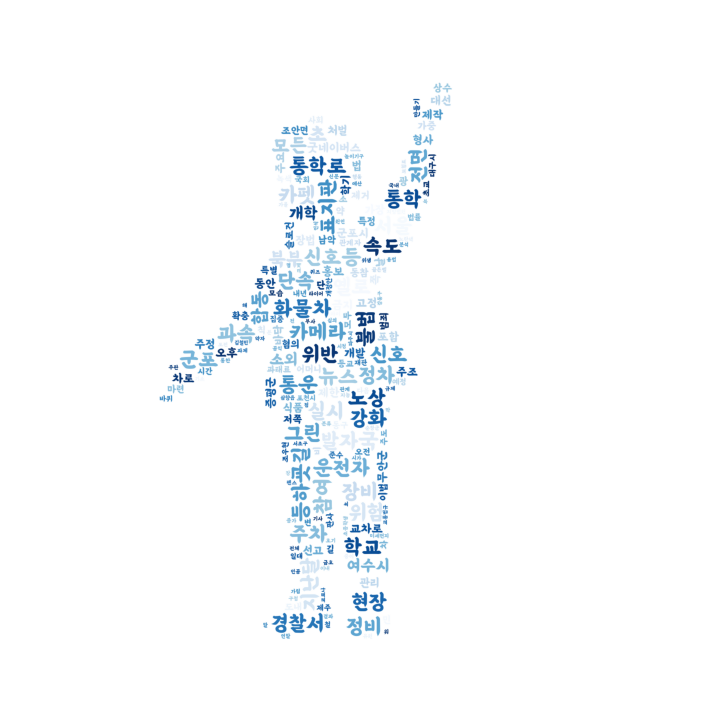

In [16]:
rtags = get_tags(rtext, ntags=400)
# print(rtags)

Wordcloud(rtags, '어린이보호구역','../data/WordCloud/mask/mask3.jpeg')
